In [3]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Create the dataset
data = {
    'text': [
        "I love the new iPhone camera! 📸",
        "This phone is too expensive.",
        "Not bad but could be better.",
        "Amazing performance and battery life! 🔋",
        "I hate the new update. It's slow.",
        "Just an average phone."
    ],
    'sentiment': [
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "neutral"
    ]
}

df = pd.DataFrame(data)

# Step 3: Show the dataset
print("🔍 Sample Dataset:")
display(df)  # display works nicely in Jupyter


🔍 Sample Dataset:


,text,sentiment
0,I love the new iPhone camera! 📸,positive
1,This phone is too expensive.,negative
2,Not bad but could be better.,neutral
3,Amazing performance and battery life! 🔋,positive
4,I hate the new update. It's slow.,negative
5,Just an average phone.,neutral


In [8]:
import seaborn as sns


In [12]:
!pip install scikit-learn


<Axes: xlabel='sentiment', ylabel='count'>

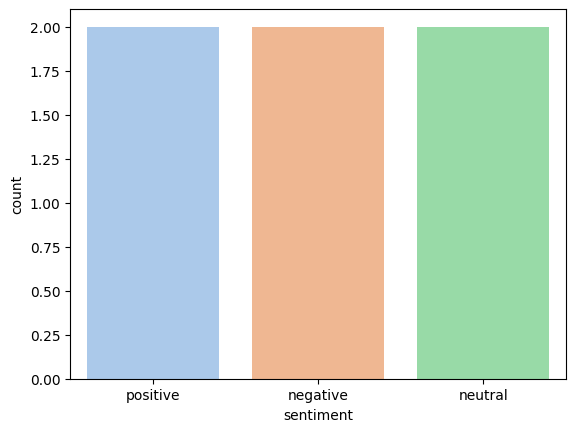

In [16]:
sns.countplot(x='sentiment',hue='sentiment',data=df,palette='pastel',legend=False)

In [25]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [44]:
import pandas as pd 
from sklearn.utils import resample

#Separate classes
df_positive=df[df['sentiment']=='positive']
df_negative=df[df['sentiment']=='negative']
df_neutral=df[df['sentiment']=='neutral']

#Upsample minority classes
df_negative_upsampled=resample(df_negative,replace=True,n_samples=len(df_positive),random_state=42)
df_neutral_upsampled=resample(df_neutral,replace=True,n_samples=len(df_positive),random_state=42)

#Combine all into one balanced dataframe
df_balanced=pd.concat([df_positive,df_negative_upsampled,df_neutral_upsampled])

#Shuffle the data
df_balanced=df_balanced.sample(frac=1,random_state=42).reset_index(drop=True)

#Check new balanced class counts
print(df_balanced['sentiment'].value_counts())


sentiment
positive    2
neutral     2
negative    2
Name: count, dtype: int64


In [46]:
# Predict custom input
sample_text = ["This phone is fantastic!", "Terrible battery life!", "It's okay, not great."]
predicted_sentiments = model.predict(sample_text)

# Display results
for text, sentiment in zip(sample_text, predicted_sentiments):
    print(f"'{text}' ➡️ {sentiment}")


'This phone is fantastic!' ➡️ neutral
'Terrible battery life!' ➡️ positive
'It's okay, not great.' ➡️ neutral
